In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


In [2]:
sw = pd.read_csv(
    "../../data/processed/region/SW/AQMS/20240601_20240812/aqms_SW_20240601_20240812_hourly.csv",
    parse_dates=True,
    index_col="datetime",
)
sw
sw = sw.fillna(0)
sw = sw.rename(
    columns={
        "CAMDEN PM2.5": "CAMDEN",
        "LIVERPOOL PM2.5": "LIVERPOOL",
        "BRINGELLY PM2.5": "BRINGELLY",
        "BARGO PM2.5": "BARGO",
        "MACARTHUR PM2.5": "MACARTHUR",
        "OAKDALE PM2.5": "OAKDALE",
        "CAMPBELLTOWN WEST PM2.5": "CAMPBELLTOWN WEST",
    }
)


In [3]:
target = "CAMDEN"
neighbor = [
    "LIVERPOOL",
    "BRINGELLY",
    "BARGO",
    "MACARTHUR",
    "OAKDALE",
    "CAMPBELLTOWN WEST",
]


In [4]:
target_station = sw[[target]]
neighbor_data_dict = {}

for station in neighbor:
    neighbor_data_dict[station] = sw[station]


In [15]:
def calculate_pearson_correlation(target_data, neighbor_data):
    """
    Calculate the Pearson correlation coefficient between the target station data and a neighbor station's data.
    """
    pearson_r, _ = pearsonr(target_data, neighbor_data)
    return pearson_r


def samice_impute(target_data, neighbor_data_dict, time_steps, r_thr=0.5):
    """
    Spatially-Adjusted Multivariate Imputation by Chained Equations (SAMICE) implementation
    for 12-hour segments.

    Parameters:
        target_data (pd.Series): The time series data from the target station with missing values.
        neighbor_data_dict (dict): Dictionary containing time series data from neighboring stations.
        time_steps (int): Number of time steps (e.g., 12 for 12 hours).
        r_thr (float): Threshold for Pearson correlation to consider a neighbor station's data.

    Returns:
        pd.Series: The time series with missing values imputed.
    """
    # Initialize the imputed data as a copy of the target data
    # imputed_data = target_data.copy()
    aqms = []
    # Identify the missing data indices
    # missing_indices = target_data[target_data.isnull()].index
    total_steps = len(target_station)

    # Iterate through the data in time-step chunks
    for start in range(0, total_steps, time_steps):
        end = min(start + time_steps, total_steps)
        print("start", start)
        print("end", end)
        segment_target_data = target_data[start:end]

        # for idx in segment_target_data[segment_target_data.isnull()].index:
        valid_neighbors = {}

        # Compute Pearson correlation for each neighbor station within the current 12-hour segment
        for station_name, station_data in neighbor_data_dict.items():
            segment_neighbor_data = station_data[start:end]

            # Ensure both arrays are 1D (no need to reshape)
            segment_target_data_flat = segment_target_data.dropna().to_numpy().flatten()
            segment_neighbor_data_flat = (
                segment_neighbor_data.dropna().to_numpy().flatten()
            )
            print("station: ", station_name)
            # print("target: ", segment_target_data_flat)
            # print("neighbor: ", segment_neighbor_data_flat)
            correlation = calculate_pearson_correlation(
                segment_target_data_flat, segment_neighbor_data_flat
            )
            # print("correlation: ", correlation)
            if correlation >= r_thr:
                valid_neighbors[station_name] = correlation
        chosen_neighbor = None
        if valid_neighbors:
            chosen_neighbor = max(valid_neighbors, key=valid_neighbors.get)

        print("valid_neighbors ", valid_neighbors)
        print("chosen: ", chosen_neighbor)
        aqms.append(chosen_neighbor)
        # If no neighbors are sufficiently correlated, use the mean of the target data in the segment
        if not valid_neighbors:
            imputed_value = segment_target_data.mean()
        else:
            imputed_value = neighbor_data_dict[chosen_neighbor][start:end]
        aqms = ["CAMDEN" if aqm is None else aqm for aqm in aqms]
    return aqms


# Choose the number of time steps (e.g., 12)
time_steps = 12

# Run the DSI over all the data in 12-hour chunks
aqms = samice_impute(target_station, neighbor_data_dict, time_steps, r_thr=0.7)

# print("Final:\n", result)
# print(aqms)


start 0
end 12
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 12
end 24
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 24
end 36
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 36
end 48
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'LIVERPOOL': 0.7154533111908654, 'BRINGELLY': 0.7401724292173993, 'CAMPBELLTOWN WEST': 0.8846888544802879}
chosen:  CAMPBELLTOWN WEST
start 48
end 60
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'CAMPBELLTOWN WEST': 0.7553432786853262

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 324
end 336
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'OAKDALE': 0.8788375429665646, 'CAMPBELLTOWN WEST': 0.8883930891740854}
chosen:  CAMPBELLTOWN WEST
start 336
end 348
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'LIVERPOOL': 0.7344070233612295}
chosen:  LIVERPOOL
start 348
end 360
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 360
end 372
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 372
end 384
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  C

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 588
end 600
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 600
end 612
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 612
end 624
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'LIVERPOOL': 0.7556274297370562}
chosen:  LIVERPOOL
start 624
end 636
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 636
end 648
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTO

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 684
end 696
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'BRINGELLY': 0.804440593369239, 'CAMPBELLTOWN WEST': 0.8840445583744799}
chosen:  CAMPBELLTOWN WEST
start 696
end 708
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {'BRINGELLY': 0.7720323494949547, 'BARGO': 0.7136828413734719, 'CAMPBELLTOWN WEST': 0.9697008224739961}
chosen:  CAMPBELLTOWN WEST
start 708
end 720
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 720
end 732
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
vali

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 780
end 792
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 792
end 804
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 804
end 816
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 816
end 828
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 828
end 840
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 840
end 852
station:  LI

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

station:  CAMPBELLTOWN WEST
valid_neighbors  {'CAMPBELLTOWN WEST': 0.790377651596106}
chosen:  CAMPBELLTOWN WEST
start 912
end 924
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 924
end 936
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 936
end 948
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 948
end 960
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 960
end 972
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 972
end 984

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 1212
end 1224
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 1224
end 1236
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 1236
end 1248
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 1248
end 1260
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {}
chosen:  None
start 1260
end 1272
station:  LIVERPOOL
station:  BRINGELLY
station:  BARGO
station:  MACARTHUR
station:  OAKDALE
station:  CAMPBELLTOWN WEST
valid_neighbors  {

C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, _ = pearsonr(target_data, neighbor_data)
C:\Users\13993807_admin\AppData\Local\Temp\ipykernel_15212\1133651782.py:5: ConstantInputWarning: An inp

In [16]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    max_error,
    mean_absolute_percentage_error,
)
from scipy.stats import pearsonr


def pearson_r_multi_output(y_true, y_pred):
    """
    Calculate the Pearson correlation coefficient for each output dimension in multi-output regression.

    Parameters:
        y_true (ndarray): True values (n_samples, n_outputs).
        y_pred (ndarray): Predicted values (n_samples, n_outputs).

    Returns:
        ndarray: Pearson correlation coefficient for each output dimension.
    """
    pearson_r_values = []
    for i in range(y_true.shape[1]):  # Loop over each output dimension
        r, _ = pearsonr(y_true[:, i], y_pred[:, i])
        pearson_r_values.append(r)
    return np.array(pearson_r_values)


def max_error_multi_output(y_true, y_pred):
    """
    Calculate the maximum error for each output separately in multi-output regression.

    Parameters:
        y_true (ndarray): True values (n_samples, n_outputs).
        y_pred (ndarray): Predicted values (n_samples, n_outputs).

    Returns:
        ndarray: Maximum error for each output.
    """
    errors = []
    for i in range(y_true.shape[1]):  # Loop over each output dimension
        max_err = max_error(y_true[:, i], y_pred[:, i])
        errors.append(max_err)
    return np.array(errors)


def evaluate_regression_model(X_train, y_train, X_test, y_test):
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    # print("true: ", y_test)
    # print("pred: ", y_pred)
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    pearson_r_values = []
    print("AAAA: ", y_test.shape[1])
    for i in range(y_test.shape[0]):
        print("BBB: ", y_test[i, :], y_pred[i, :])
        r, _ = pearsonr(y_test[i, :], y_pred[i, :])
        pearson_r_values.append(r)

    pearson_r_values = np.array(pearson_r_values)
    # pearson_r = pearson_r_multi_output(y_test, y_pred)
    average_pearson_r = np.mean(pearson_r_values)
    r2 = r2_score(y_test, y_pred)
    max_error_value = max_error_multi_output(y_test, y_pred)
    # max_error_value = max(max_errors)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # return rmse, mae, pearson_r, r2, max_error_value, mape

    print("Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("R-Squared:", r2)
    print("Pearson r", pearson_r_values)
    print("Average Pearson r", average_pearson_r)
    print("Max error value:", max_error_value)
    print("MAPE:", mape)
    
    stats = {
        "Mean Squared Error": rmse,
        "Mean Absolute Error": mae,
        "R-Squared": r2,
        "Pearson r": pearson_r_values,
        "Average Pearson r": average_pearson_r,
        "Max error value": max_error_value,
        "MAPE": mape,
    }

    return model, y_pred, stats


In [17]:
def create_regression_data(
    target_station, neighbor_data_dict, method_results, time_steps=12, predict_steps=3
):
    X = []
    y = []
    X_indeces = []
    y_indeces = []
    total_steps = len(target_station)
    i = 0
    for start in range(0, total_steps - time_steps - predict_steps + 1, time_steps):
        end = start + time_steps
        # print("start: ", start)
        # Get the identified neighbor from SAMICE or DSI
        chosen_neighbor = method_results[i]
        i += 1
        b = target_station[start:end].index
        X_indeces.append(b)
        if chosen_neighbor == "CAMDEN":
            a = target_station[start:end].values

            X.append(a.flatten())

        else:
            # Prepare the input (12-hour segment) and output (next 3 timesteps) for the regression model
            X.append(neighbor_data_dict[chosen_neighbor][start:end].values)
        y.append(
            target_station[end : end + predict_steps].values.flatten()
        )  # Predict the next 3 time steps
        c = target_station[end : end + predict_steps].index
        y_indeces.append(c)
    print("IIIII: ", i)
    print(X)
    print(y)
    return np.array(X), np.array(y), X_indeces, y_indeces


In [18]:
# Example using SAMICE results:
X, y, X_indeces, y_indeces = create_regression_data(
    target_station, neighbor_data_dict, aqms, time_steps=12, predict_steps=12
)

# Split into training and testing sets (e.g., 80% training, 20% testing)
split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]
X_test_indeces, y_test_indeces = (
    X_indeces[split_idx:],
    y_indeces[split_idx:],
)


# Evaluate the model
model, y_pred, stats = evaluate_regression_model(X_train, y_train, X_test, y_test)


IIIII:  144
[array([11. , 10.3,  6.7,  0. , -0.2,  6.4,  2.4,  5.5,  3.3,  1.2,  1.2,
        1.9]), array([ 5.3,  8.4,  5.5,  5.2,  7.4,  3.3,  4.6,  0.7, -2.7, -1.4, -0.4,
       -1.3]), array([ 1.4, -0.3,  1.9, -3.4, -0.8,  5.1,  4.3,  1.2,  2.4, -0.2, -1.6,
        1.2]), array([-8.8, -7.5, -1.9,  2.4,  2.6,  1.1,  2.2,  2.8, -1.2,  4.3,  6.4,
        9.3]), array([ 9.7,  8.2,  7.2,  7.5,  4.8,  4.3,  6. ,  8.4, 11.1, 10.4,  6. ,
        2.4]), array([ 0. , -9.5,  0.4, -4.7,  5.5,  7.9,  8.7,  5.7, 12.9, 15.8, 10.2,
        9.6]), array([ 8.1,  4.5,  6.1,  6.5,  7.9, 11.1,  9.1,  3.9,  4.5,  4.2,  7.6,
        2.5]), array([5.1, 4.6, 1.2, 5.9, 4.9, 1.1, 3.6, 2.6, 4.6, 6.3, 3.5, 8.7]), array([ 7.5,  8.9,  7.1,  6.6,  6.9,  8.6,  5.2,  7.6,  9. , 10.9, 11.9,
        4.8]), array([5. , 3.7, 5.8, 4.4, 0. , 0.3, 5.1, 2.7, 7.2, 8.6, 2.1, 5.5]), array([ 4.7, -0.3,  0.9, -0.5,  4.1,  7.1, -0.5,  4.1,  7.8,  1.4,  0.9,
        1.6]), array([ 0.4, -3.7,  1.1,  0.4, -0.5,  2.9, -1.9,  8.1,  7

In [9]:
print(X_test_indeces)
print(y_test_indeces)


[DatetimeIndex(['2024-07-28 13:00:00', '2024-07-28 14:00:00',
               '2024-07-28 15:00:00', '2024-07-28 16:00:00',
               '2024-07-28 17:00:00', '2024-07-28 18:00:00',
               '2024-07-28 19:00:00', '2024-07-28 20:00:00',
               '2024-07-28 21:00:00', '2024-07-28 22:00:00',
               '2024-07-28 23:00:00', '2024-07-29 00:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None), DatetimeIndex(['2024-07-29 01:00:00', '2024-07-29 02:00:00',
               '2024-07-29 03:00:00', '2024-07-29 04:00:00',
               '2024-07-29 05:00:00', '2024-07-29 06:00:00',
               '2024-07-29 07:00:00', '2024-07-29 08:00:00',
               '2024-07-29 09:00:00', '2024-07-29 10:00:00',
               '2024-07-29 11:00:00', '2024-07-29 12:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None), DatetimeIndex(['2024-07-29 13:00:00', '2024-07-29 14:00:00',
               '2024-07-29 15:00:00', '2024-07-29 16:00:00',
         

In [10]:
print(aqms[-29:])


['CAMDEN', 'CAMDEN', 'CAMDEN', 'OAKDALE', 'BRINGELLY', 'BRINGELLY', 'CAMDEN', 'CAMDEN', 'LIVERPOOL', 'CAMDEN', 'CAMPBELLTOWN WEST', 'CAMDEN', 'LIVERPOOL', 'CAMDEN', 'CAMDEN', 'CAMPBELLTOWN WEST', 'LIVERPOOL', 'CAMDEN', 'CAMDEN', 'CAMDEN', 'CAMDEN', 'CAMDEN', 'CAMDEN', 'CAMDEN', 'OAKDALE', 'CAMDEN', 'CAMPBELLTOWN WEST', 'CAMDEN', 'CAMDEN']


In [11]:
print(y_pred)
print(X_test)


[[ 2.8568679   3.94955538  2.85016349  2.69927753  1.56381552  1.05728401
   1.84910789  3.68752667  3.43675577  3.14091121  4.0343917   3.53657179]
 [ 2.59434083  3.63028523  2.58274778  1.81997035  1.0712425   1.00225358
   2.80103508  4.98744026  4.36671212  4.91928077  4.68354459  5.27126652]
 [ 2.2679037   3.0514426   2.87569025  2.59175294  2.33474916  2.09065833
   4.50323629  5.83742215  4.79380001  5.78941763  5.9796729   5.00396175]
 [ 2.40950274  3.42489224  2.5641275   1.73562037  1.87993141  2.0474303
   3.33242632  3.75137769  4.15970572  4.60987021  4.28031258  4.46013765]
 [ 1.92016951  1.138464    1.01181458  2.46206375  2.27143031  0.90076957
   2.50057357  5.29967728  3.59404205  3.58995393  5.21033983  4.40191962]
 [ 5.14265403  3.12667952  5.53987125  3.42430589  5.62537621  5.37681677
   4.73939922  6.51974176  9.51518761  9.19789228  7.54670214  6.13655271]
 [ 0.51667767  1.8975388   0.72628027  0.62846329  2.91116634  4.34685143
   5.33587868  4.64264691  6.2990

In [22]:
print(stats)

{'Mean Squared Error': 4.579137902698572, 'Mean Absolute Error': 3.53986552447681, 'R-Squared': 0.28746953722005575, 'Pearson r': array([-0.506751  ,  0.48304168, -0.25739097, -0.34167179, -0.35144946,
        0.38520512,  0.13875548,  0.25389559,  0.24053914,  0.82966279,
        0.57263154,  0.75496128,  0.12972222,  0.39925353,  0.36253662,
        0.42970982, -0.14413439,  0.71941488,  0.53714575,  0.44452449,
        0.5710079 ,  0.60915049,  0.28245982,  0.2588776 ,  0.20967508,
        0.3508683 ,  0.25340208,  0.7605347 ,  0.63166863]), 'Average Pearson r': 0.3105947211042281, 'Max error value': array([ 8.4157235 , 12.16160704,  8.64216564,  6.65674528,  8.23854548,
        9.98116377,  9.11702578,  6.99345975, 14.34677159, 14.14080217,
       13.5192335 , 11.26287208]), 'MAPE': 1.3375740594929066}


## Plot results


In [20]:
list2 = stats["Pearson r"]
list2

array([-0.506751  ,  0.48304168, -0.25739097, -0.34167179, -0.35144946,
        0.38520512,  0.13875548,  0.25389559,  0.24053914,  0.82966279,
        0.57263154,  0.75496128,  0.12972222,  0.39925353,  0.36253662,
        0.42970982, -0.14413439,  0.71941488,  0.53714575,  0.44452449,
        0.5710079 ,  0.60915049,  0.28245982,  0.2588776 ,  0.20967508,
        0.3508683 ,  0.25340208,  0.7605347 ,  0.63166863])

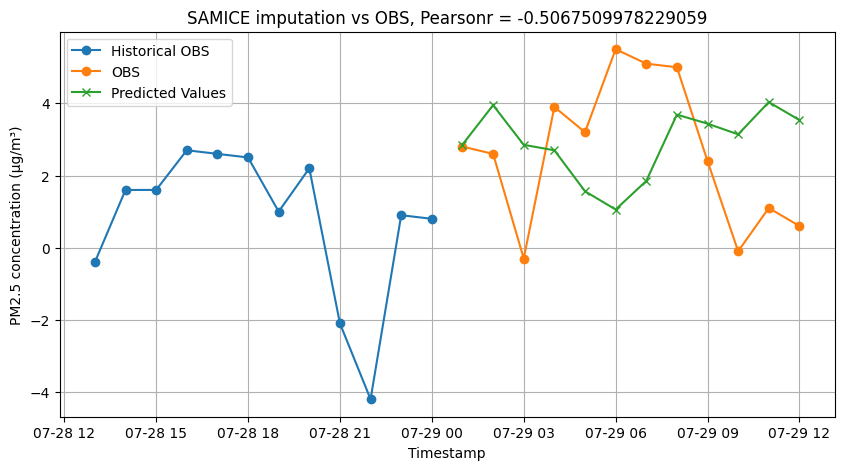

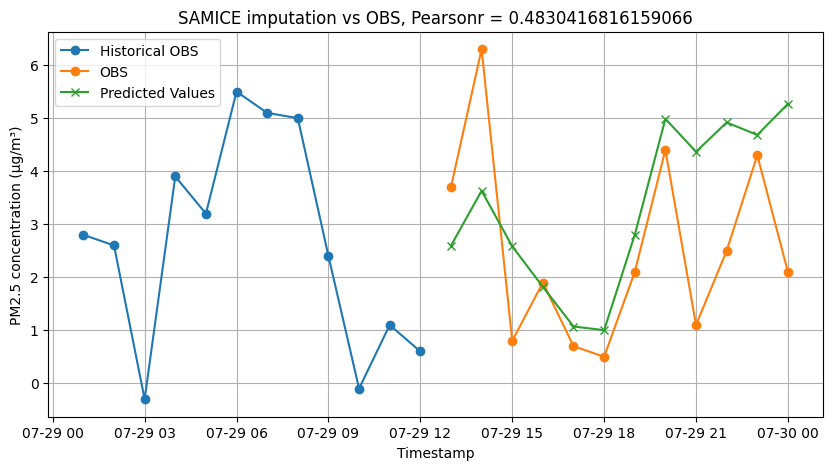

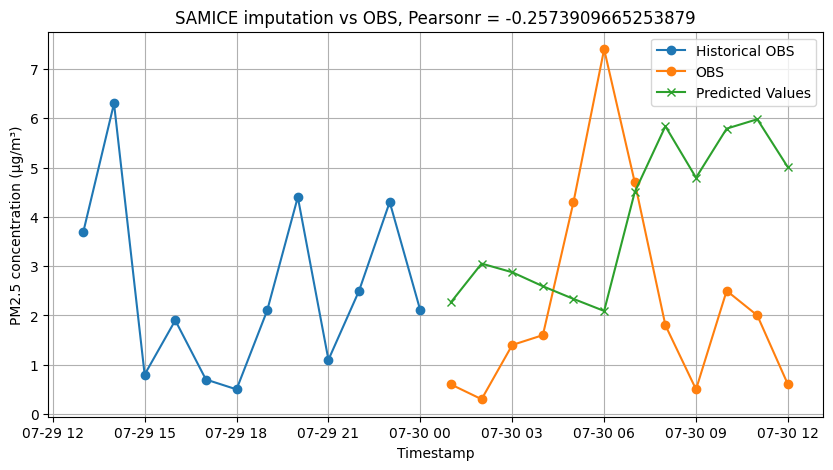

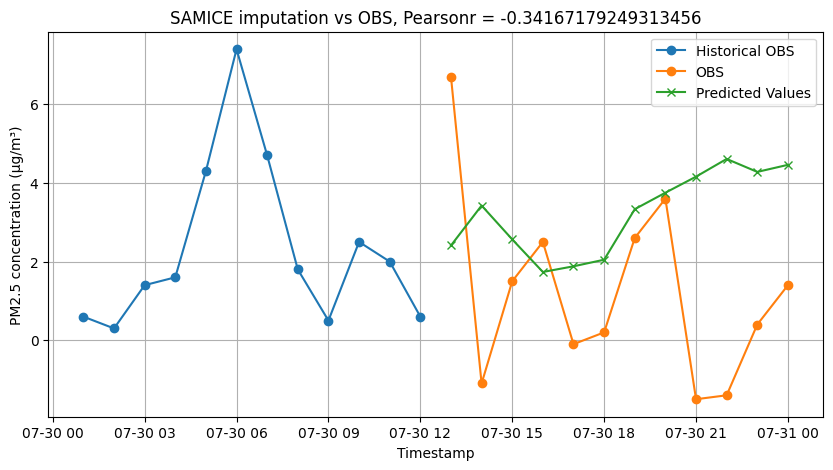

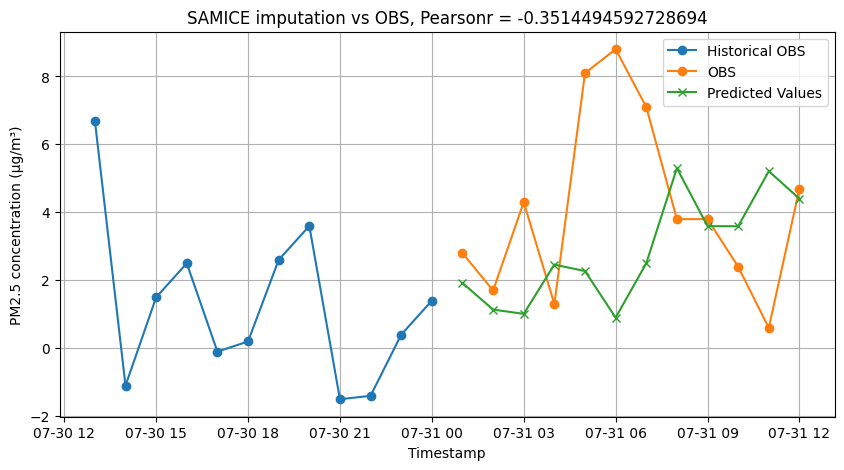

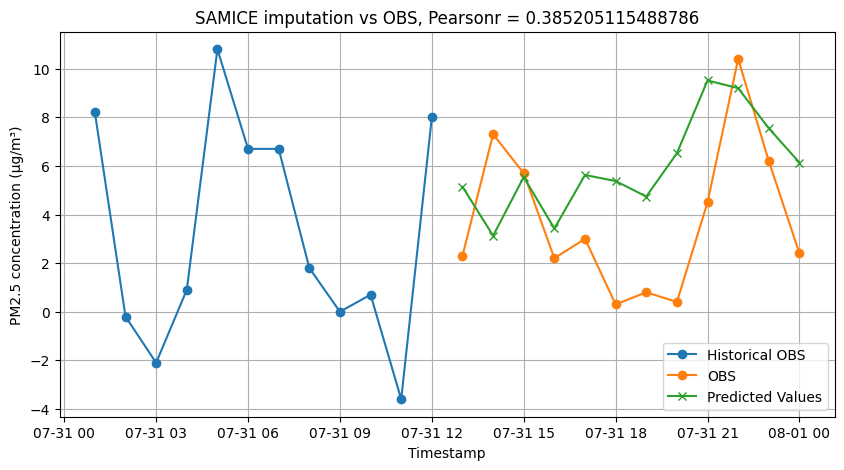

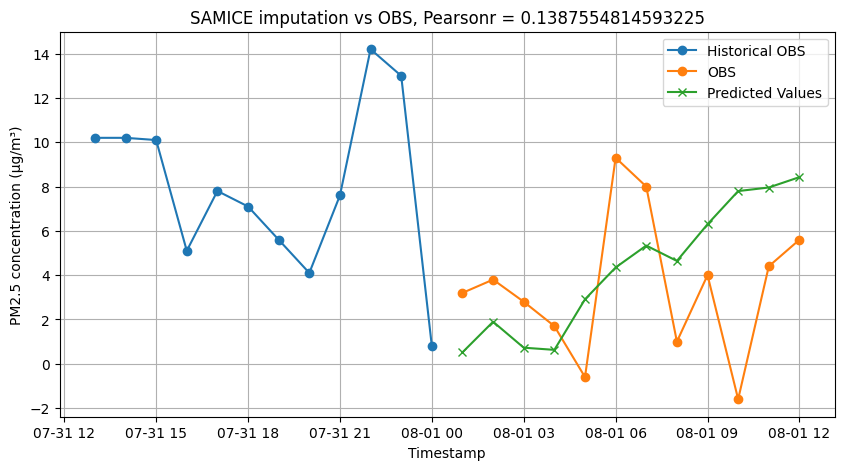

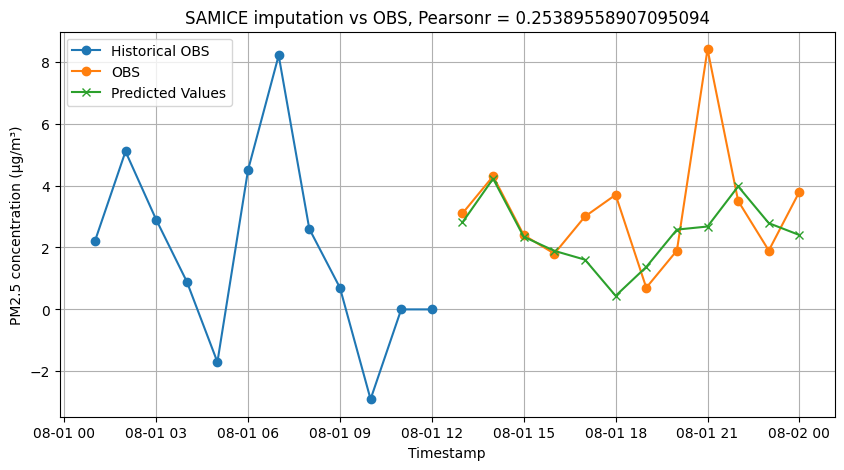

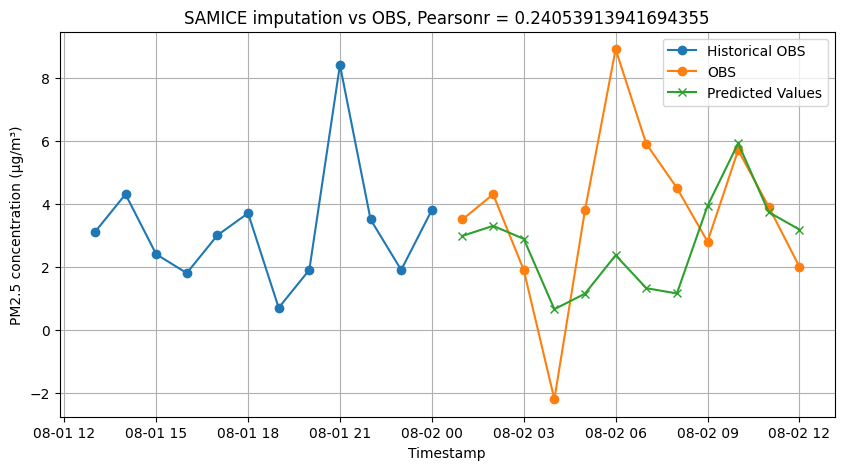

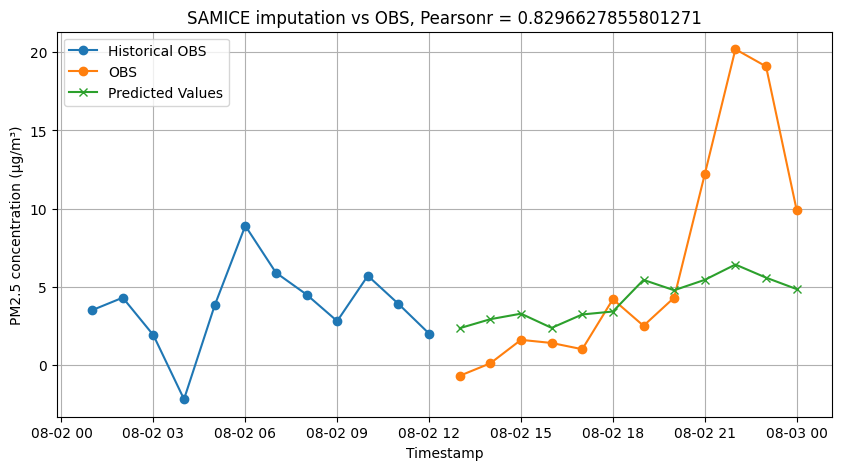

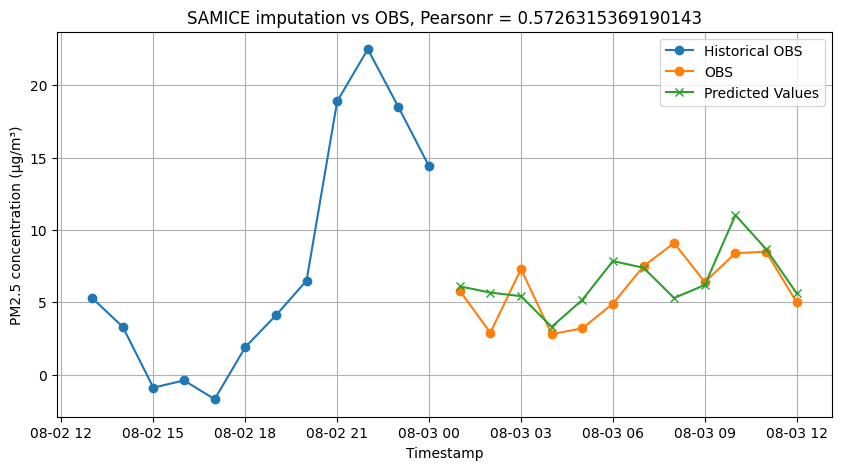

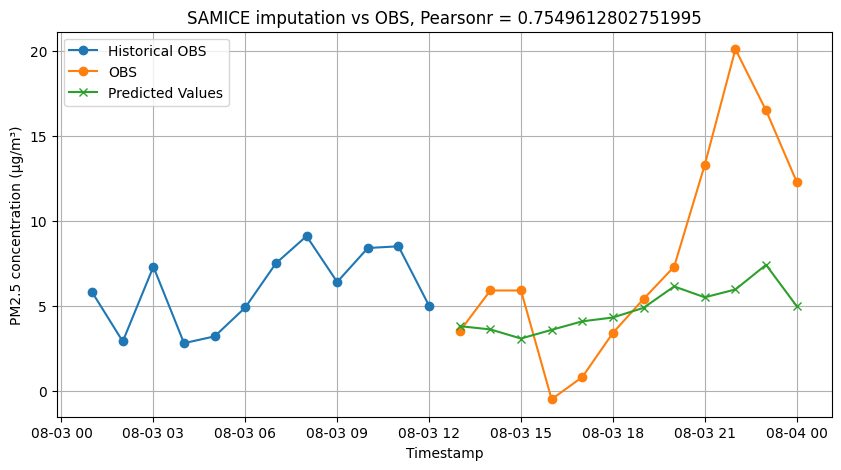

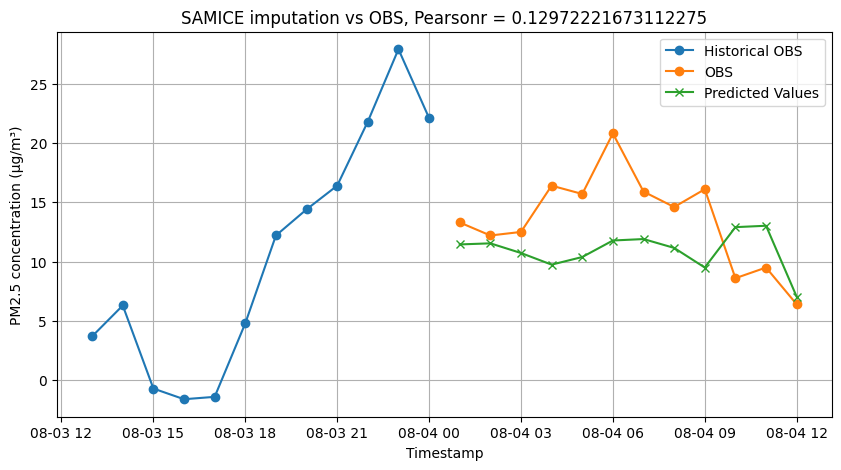

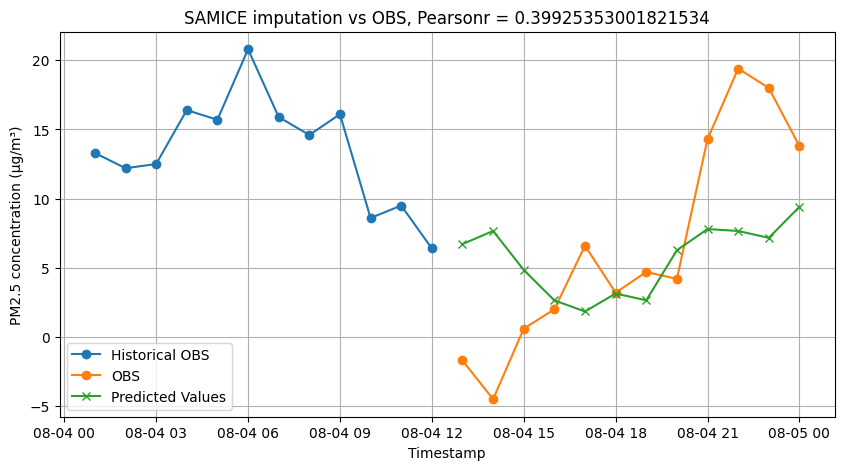

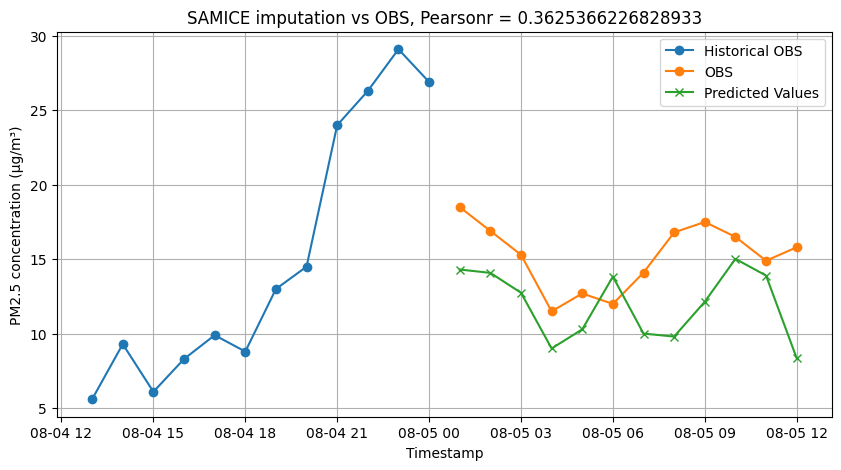

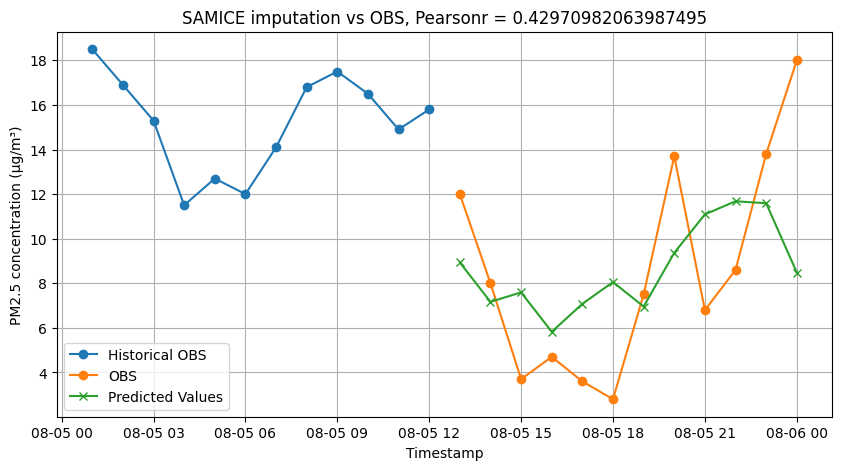

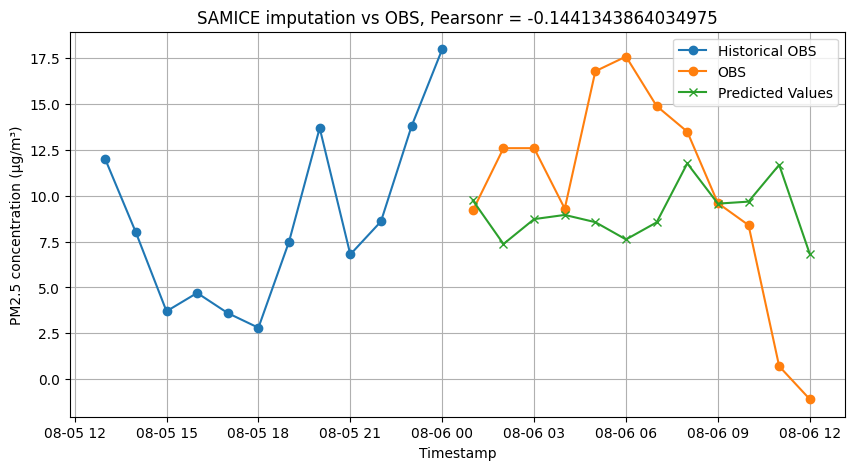

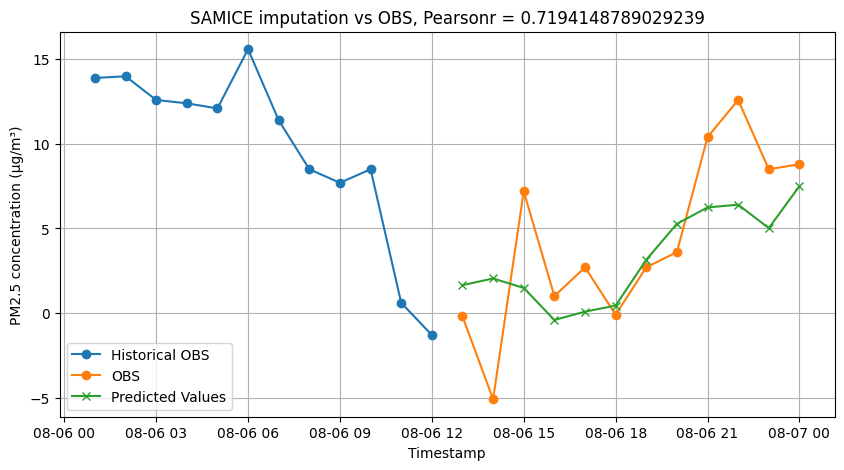

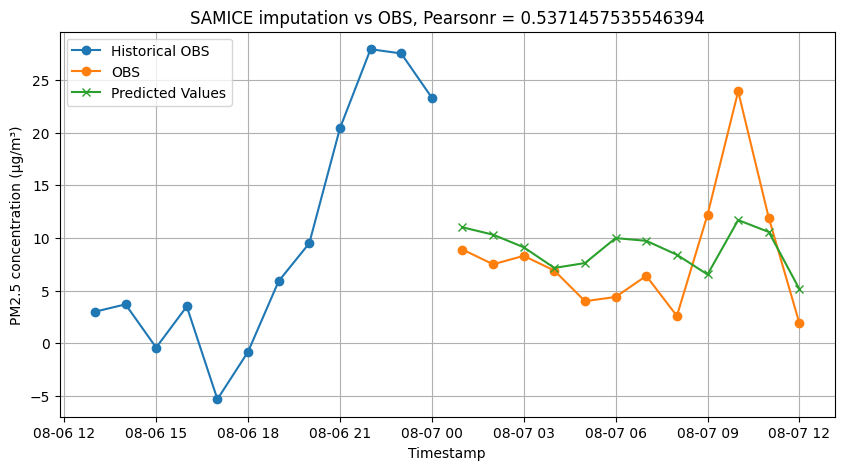

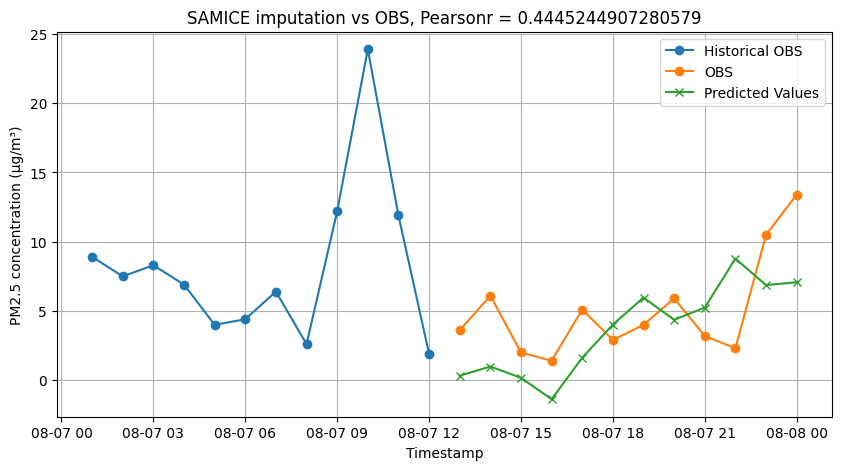

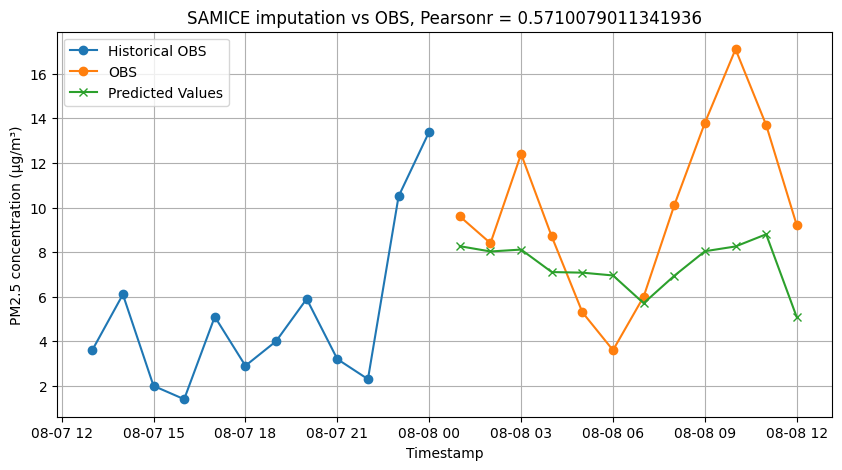

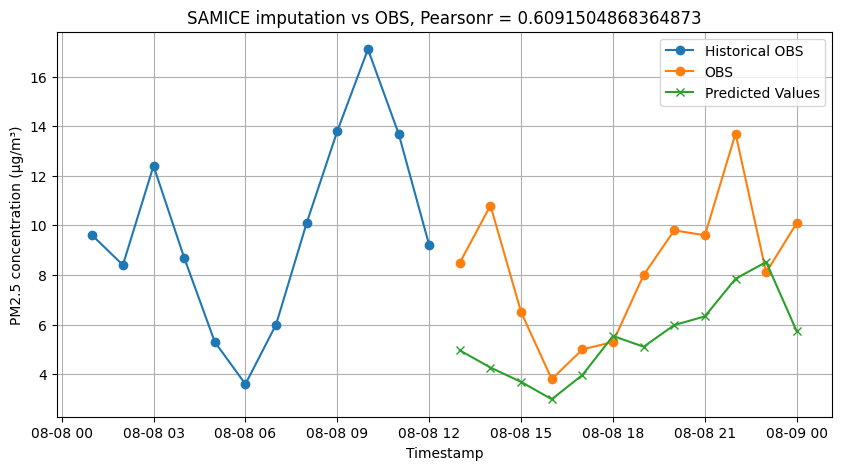

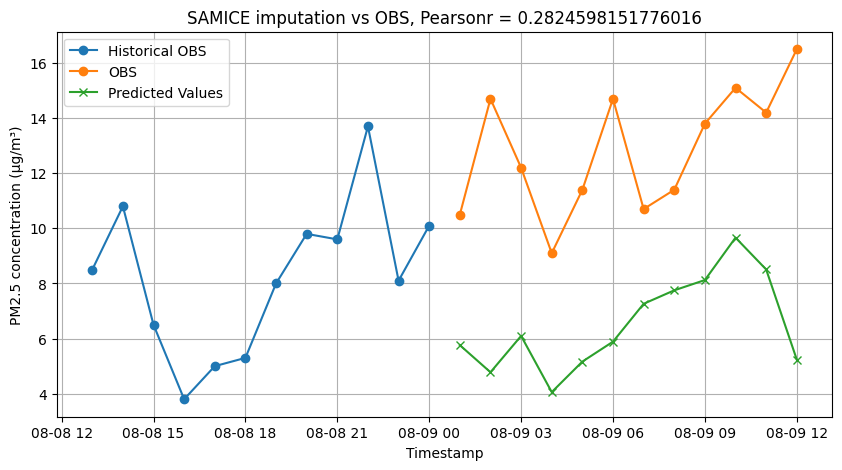

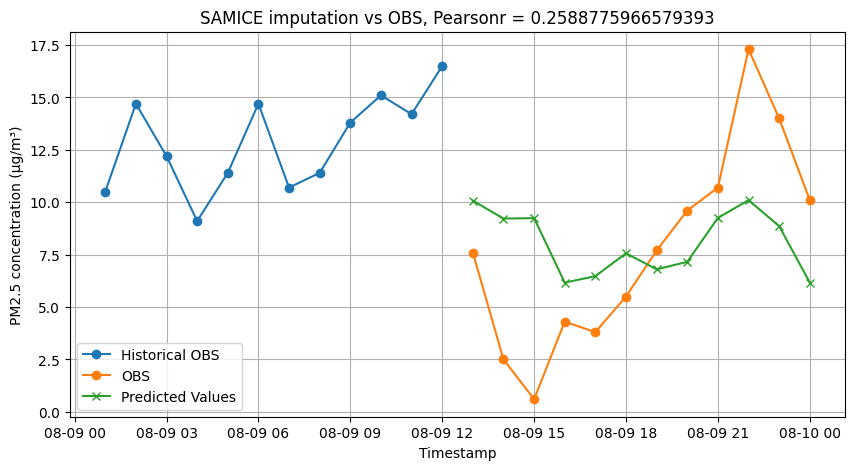

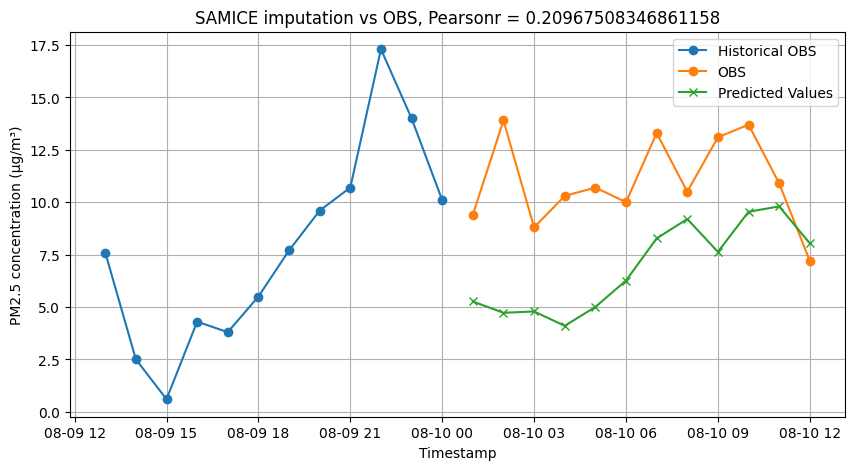

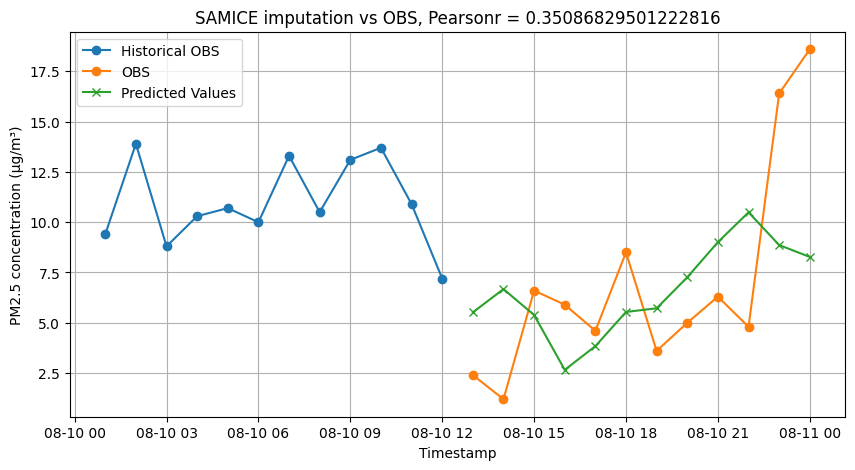

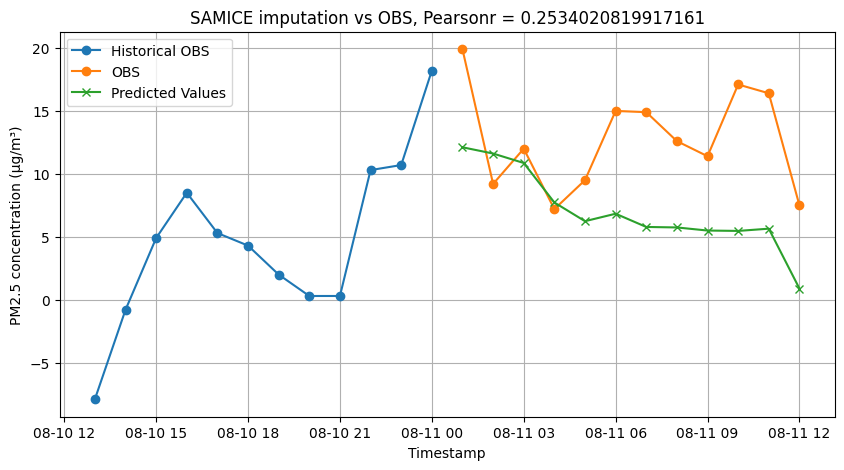

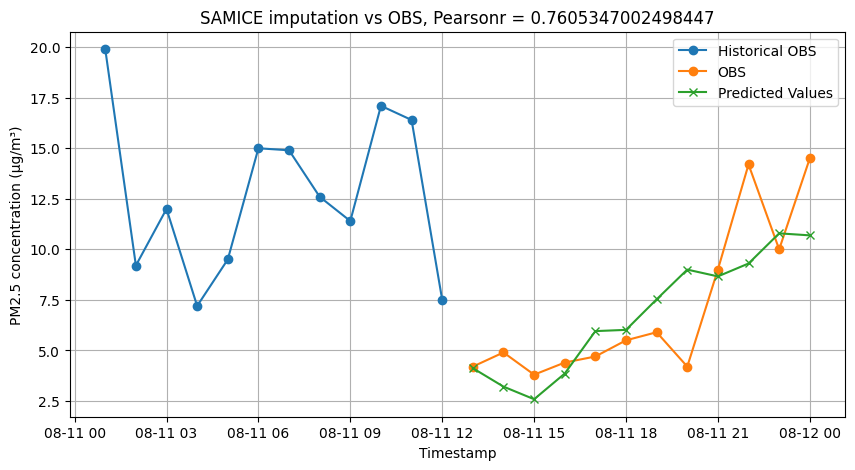

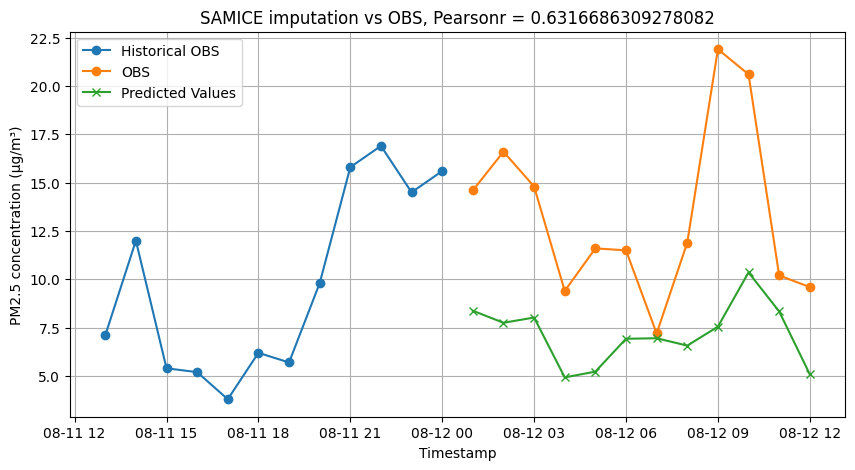

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assume X_test, y_pred, X_test_indeces, and y_test_indeces are already defined
# Example data for illustration purposes:
# X_test = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # Historical data
# y_pred = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]]) # Predicted values
# X_test_indeces = [list of datetime indices corresponding to X_test]
# y_test_indeces = [list of datetime indices corresponding to y_pred]

# Plot each set of X_test with its corresponding y_pred
for i in range(X_test.shape[0]):
    plt.figure(figsize=(10, 5))

    # Plot historical values (X_test)
    plt.plot(X_test_indeces[i], X_test[i], label="Historical OBS", marker="o")
    plt.plot(y_test_indeces[i], y_test[i], label="OBS", marker="o")

    # Plot predicted values (y_pred)
    plt.plot(y_test_indeces[i], y_pred[i], label="Predicted Values", marker="x")

    # Set the title and labels
    plt.title(f"SAMICE imputation vs OBS, Pearsonr = {list2[i]}")
    plt.xlabel("Timestamp")
    plt.ylabel("PM2.5 concentration (µg/m³)")

    # Show the legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()


In [14]:
# DSI r = 0
Mean Squared Error: 4.669347626063523
Mean Absolute Error: 3.6541388317533943
R-Squared: 0.21384357000384602
Pearson r [ 0.22300531 -0.97314648 -0.88315319 -0.94213082  0.97369462  0.90560621
 -0.88500123  0.19409679  0.94947182 -0.57754107  0.63756341 -0.58801447
 -0.14538896  0.97709542  0.98604266 -0.16712492 -0.5528364  -0.67945162
  0.78771654 -0.99896348  0.88645257  0.36235599  0.82465409  0.99294847
 -0.99999973 -0.15596302 -0.19084946  0.10410263 -0.57020202]
Average Pearson r 0.01707033326485986
Max error value: [11.61846884 11.85260871 10.79148895]
MAPE: 1.698198217063328


SyntaxError: invalid syntax (2224787783.py, line 2)

In [ ]:
# DSI r = 0.5
Mean Squared Error: 4.578025772689082
Mean Absolute Error: 3.5694981874274596
R-Squared: 0.24704009608207958
Pearson r [ 0.10031412 -0.98643177 -0.91881536 -0.87823471  0.93472463  0.86883066
 -0.11655206  0.03457198  0.85984882 -0.50551362  0.77168904 -0.6539751
 -0.29926305  0.9811705   0.99070216 -0.08060846 -0.76318524 -0.99695376
  0.74499484 -0.99829279  0.85818893  0.35326693  0.57171639  0.88433736
 -0.99790323 -0.16891374 -0.9860127   0.27411324 -0.42760403]
Average Pearson r -0.01895827701586769
Max error value: [11.57314707 11.78289427 10.16502124]
MAPE: 1.7095390878044014


In [ ]:
# DSI r = 0.7
Mean Squared Error: 4.389187710158336
Mean Absolute Error: 3.3474153245454743
R-Squared: 0.3102312857160448
Pearson r [ 0.49607052 -0.55734985 -0.8994669  -0.88225923 -0.61414053  0.9722132
 -0.84607136  0.98508915  0.99602449 -0.72390475  0.96286427 -0.64720205
 -0.45410586  0.97642109  0.99529523 -0.42524962 -0.12596079  0.43586888
  0.92342122 -0.99469179  0.82837233 -0.62257089  0.83672641  0.82731014
 -0.9974343  -0.55213624 -0.65453452 -0.35478499 -0.86520038]
Average Pearson r -0.033840933761583494
Max error value: [11.53638638 12.31715933  8.99318908]
MAPE: 1.5157275908099124


In [ ]:
# DSI r = 0.8
Mean Squared Error: 4.232779798879177
Mean Absolute Error: 3.2009771026085154
R-Squared: 0.35786061161991345
Pearson r [ 0.58830869 -0.57387958 -0.80562703 -0.97874244 -0.81094839  0.9849449
 -0.64870133  0.92710029  0.99499049 -0.85868924  0.99877857 -0.30155767
 -0.31752967  0.99174206  0.9817149  -0.13016252  0.21848425  0.95099952
  0.6390654  -0.98374447  0.73597045 -0.69595266  0.92906715  0.61883153
 -0.99629724 -0.66150611 -0.92281254 -0.39710383  0.68768266]
Average Pearson r 0.04015262589280241
Max error value: [11.49665287 11.67335249  9.16395322]
MAPE: 1.5118824708759633


In [ ]:
# DSI r = 0.9
Mean Squared Error: 3.8727554608651173
Mean Absolute Error: 2.8879670916533904
R-Squared: 0.46383071542632237
Pearson r [ 0.16454046 -0.7645147  -0.86500421 -0.83185072 -0.8781159   0.98060783
 -0.82928095  0.90178328  0.81893584 -0.97089671  0.99581996 -0.13999388
 -0.29145652  0.99806066  0.96080417 -0.99354042  0.21845058  0.93002022
  0.37698271 -0.66953601  0.9999964  -0.71859435  0.94910511  0.32559663
 -0.9327578  -0.98514359 -0.97370387 -0.740485    0.75333705]
Average Pearson r -0.041752887696328476
Max error value: [11.51332273 12.80253153  7.69458738]
MAPE: 1.377503557769037


In [ ]:
import numpy as np

# Given lists
list1 = [
    0.16454046,
    -0.7645147,
    -0.86500421,
    -0.83185072,
    -0.8781159,
    0.98060783,
    -0.29145652,
    0.99806066,
    0.96080417,
    -0.99354042,
    0.21845058,
    0.93002022,
    -0.82928095,
    0.90178328,
    0.81893584,
    -0.97089671,
    0.99581996,
    -0.13999388,
    0.37698271,
    -0.66953601,
    0.9999964,
    -0.71859435,
    0.94910511,
    0.32559663,
    -0.9327578,
    -0.98514359,
    -0.97370387,
    -0.740485,
    0.75333705,
]

list2 = [
    0.90519757,
    -0.02295812,
    -0.79175288,
    -0.25923066,
    -0.62165471,
    0.81732121,
    0.9971071,
    0.93073287,
    0.95170203,
    -0.11817822,
    -0.70747446,
    0.10226396,
    -0.96496728,
    0.91776441,
    0.67443884,
    -0.82289251,
    -0.92303904,
    0.28443383,
    0.89310151,
    -0.10700561,
    0.41231717,
    -0.74341807,
    0.95072221,
    -0.5788834,
    -0.70438336,
    0.62760837,
    0.23699069,
    -0.9140236,
    0.65026825,
]

list3 = [
    0.99875764,
    -0.11287145,
    -0.34476676,
    -0.31077073,
    -0.999985,
    0.99706681,
    0.49720264,
    0.11193666,
    0.90230993,
    -0.11504892,
    -0.95063375,
    -0.98258743,
    -0.79552522,
    0.68058737,
    0.94251948,
    -0.97407281,
    -0.82306771,
    -0.03600165,
    0.78489745,
    -0.20866076,
    0.31800052,
    -0.51236931,
    0.94132079,
    0.36462754,
    -0.59800296,
    0.76093074,
    0.12519226,
    0.25538787,
    0.98637928,
]

# Convert lists to numpy arrays
array1 = np.array(list1)
array2 = np.array(list2)
array3 = np.array(list3)

# Filter out only the non-negative values
non_negative_values1 = array1[array1 >= 0]
non_negative_values2 = array2[array2 >= 0]
non_negative_values3 = array2[array3 >= 0]


# Calculate the average of non-negative values
average_non_negative1 = np.mean(non_negative_values1)
average_non_negative2 = np.mean(non_negative_values2)
average_non_negative3 = np.mean(non_negative_values3)


# Display the result
print("Non-negative values:", average_non_negative1)
print("Average of non-negative values:", average_non_negative2)
print("Average of non-negative values:", average_non_negative3)


Non-negative values: 0.7410029214285715
Average of non-negative values: 0.6901313346666668
Average of non-negative values: 0.5648243486666668


In [ ]:
# SAMICE r = 0.7
Mean Squared Error: 4.118532191359823
Mean Absolute Error: 3.23600136467979
R-Squared: 0.40619965183484824
Pearson r [ 0.90519757 -0.02295812 -0.79175288 -0.25923066 -0.62165471  0.81732121
  0.9971071   0.93073287  0.95170203 -0.11817822 -0.70747446  0.10226396
 -0.96496728  0.91776441  0.67443884 -0.82289251 -0.92303904  0.28443383
  0.89310151 -0.10700561  0.41231717 -0.74341807  0.95072221 -0.5788834
 -0.70438336  0.62760837  0.23699069 -0.9140236   0.65026825]
Average Pearson r 0.0714520033420799
Max error value: [ 8.41405544 12.12202151  8.68294777]
MAPE: 1.6600393400670521


In [ ]:
# SAMICE r = 0.5
Mean Squared Error: 3.921883735344953
Mean Absolute Error: 2.965496379793363
R-Squared: 0.4505224946834852
Pearson r [ 0.99875764 -0.11287145 -0.34476676 -0.31077073 -0.999985    0.99706681
  0.49720264  0.11193666  0.90230993 -0.11504892 -0.95063375 -0.98258743
 -0.79552522  0.68058737  0.94251948 -0.97407281 -0.82306771 -0.03600165
  0.78489745 -0.20866076  0.31800052 -0.51236931  0.94132079  0.36462754
 -0.59800296  0.76093074  0.12519226  0.25538787  0.98637928]
Average Pearson r 0.06561215520937036
Max error value: [ 9.76799977 12.4422481   8.60130845]
MAPE: 1.66711620032308
